# Declaration of Originality

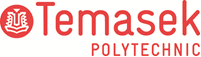

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [22]:
FILE_PATH= "COEBiddingResultsPrices.csv"
df = pd.read_csv(FILE_PATH)
df


,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889
...,...,...,...,...,...,...,...
1885,2025-12,2,Category A,1283,1259,1647,109501
1886,2025-12,2,Category B,838,832,968,115102
1887,2025-12,2,Category C,286,285,407,77003
1888,2025-12,2,Category D,536,532,632,8081


In [23]:
# Fix: convert object numeric columns to numbers
for col in ["bids_success", "bids_received"]:
    df[col] = (
        df[col].astype(str)
              .str.replace(",", "", regex=False)
              .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.dtypes)
print("Nulls after conversion:\n", df[["bids_success","bids_received"]].isna().sum())


month            object
bidding_no        int64
vehicle_class    object
quota             int64
bids_success      int64
bids_received     int64
premium           int64
dtype: object
Nulls after conversion:
 bids_success     0
bids_received    0
dtype: int64


## 2.2 Summary Statistics

In [24]:

# Understand the type of variable for each column
print("Shape:", df.shape)
display(df.head())

print("\nDtypes:")
print(df.dtypes)

print("\nInfo:")
df.info()

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique")

# Try parsing month to datetime (data.gov often stores YYYY-MM)
if "month" in df.columns:
    df["month"] = pd.to_datetime(df["month"], errors="coerce")
    print("\nParsed 'month' to datetime. Null months:", df["month"].isna().sum())


Shape: (1890, 7)


,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889



Dtypes:
month            object
bidding_no        int64
vehicle_class    object
quota             int64
bids_success      int64
bids_received     int64
premium           int64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1890 non-null   object
 1   bidding_no     1890 non-null   int64 
 2   vehicle_class  1890 non-null   object
 3   quota          1890 non-null   int64 
 4   bids_success   1890 non-null   int64 
 5   bids_received  1890 non-null   int64 
 6   premium        1890 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 103.5+ KB

Unique values per column:
month: 189 unique
bidding_no: 2 unique
vehicle_class: 5 unique
quota: 846 unique
bids_success: 870 unique
bids_received: 1087 unique
premium: 1538 unique

Parsed 'month' to datetime. Null months: 0


In [25]:
## Check for missing data
# Check for missing data
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_pct
}).sort_values("missing_count", ascending=False)

display(missing_table)

# Quick view of rows with any missing values
display(df[df.isna().any(axis=1)].head(10))


,missing_count,missing_%
month,0,0.0
bidding_no,0,0.0
vehicle_class,0,0.0
quota,0,0.0
bids_success,0,0.0
bids_received,0,0.0
premium,0,0.0


,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium


In [26]:
#quick double check
for col in ["bids_success", "bids_received"]:
    print(col, df[col].astype(str).str.lower().isin(["na", "n/a", "null", "-", ""]).sum())

print("Any negative quota?", (df["quota"] < 0).sum())
print("Any negative premium?", (df["premium"] < 0).sum())
print("bids_success > bids_received?", (df["bids_success"] > df["bids_received"]).sum())

bids_success 0
bids_received 0
Any negative quota? 0
Any negative premium? 0
bids_success > bids_received? 0


In [27]:
## Describe data distribution

display(df.describe(include="all").T)

# Category breakdowns (if columns exist)
for col in ["vehicle_class", "bidding_no"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        display(df[col].value_counts(dropna=False))

# Premium stats by vehicle class
if {"vehicle_class", "premium"}.issubset(df.columns):
    display(df.groupby("vehicle_class")["premium"].describe())


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
month,1890,NaN,NaN,NaN,2017-12-02 04:34:17.142857216,2010-01-01 00:00:00,2013-12-01 00:00:00,2017-11-01 00:00:00,2022-01-01 00:00:00,2025-12-01 00:00:00,NaN
bidding_no,1890.0,NaN,NaN,NaN,1.5,1.0,1.0,1.5,2.0,2.0,0.500132
vehicle_class,1890,5,Category A,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quota,1890.0,NaN,NaN,NaN,567.674074,43.0,288.25,441.0,670.75,2272.0,419.552542
bids_success,1890.0,NaN,NaN,NaN,558.735979,39.0,281.0,428.5,657.0,2246.0,417.92335
bids_received,1890.0,NaN,NaN,NaN,843.541799,65.0,429.0,631.0,1038.5,4545.0,629.139277
premium,1890.0,NaN,NaN,NaN,51647.83545,852.0,29501.0,49789.5,73807.75,158004.0,33350.323076



Value counts for vehicle_class:


vehicle_class
Category A    378
Category B    378
Category C    378
Category D    378
Category E    378
Name: count, dtype: int64


Value counts for bidding_no:


bidding_no
1    945
2    945
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
vehicle_class,,,,,,,,
Category A,378.0,59792.248677,23642.829340,18502.0,41454.25,56001.0,77201.0,128105.0
Category B,378.0,71313.783069,29049.507483,19190.0,47526.75,67157.0,93376.0,150001.0
Category C,378.0,48743.529101,17098.642181,19001.0,33022.25,48001.0,60176.5,91101.0
Category D,378.0,5872.761905,3256.704837,852.0,2503.75,6195.0,8708.5,13189.0
Category E,378.0,72516.854497,29442.616138,19889.0,48667.00,67004.5,94980.0,158004.0


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

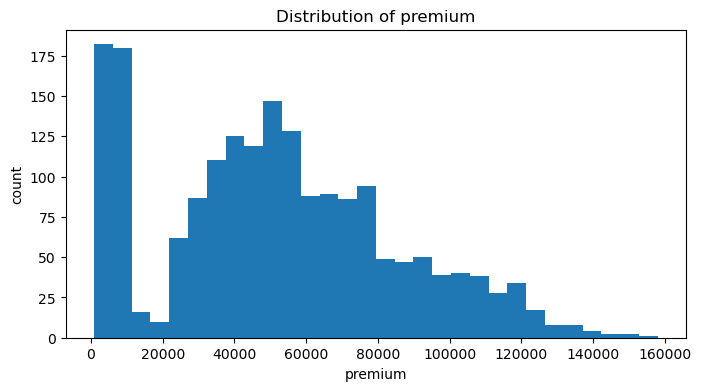

<Figure size 800x400 with 0 Axes>

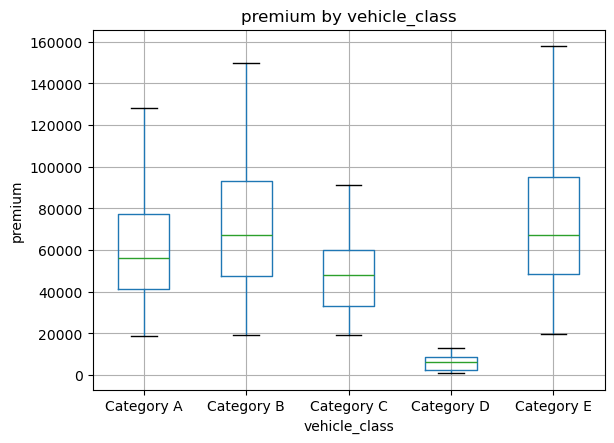

In [28]:
## Understanding distribution of target
## Understanding distribution of target

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df["premium"], bins=30)
plt.title("Distribution of premium")
plt.xlabel("premium")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
df.boxplot(column="premium", by="vehicle_class")
plt.title("premium by vehicle_class")
plt.suptitle("")
plt.xlabel("vehicle_class")
plt.ylabel("premium")
plt.show()


### 2.3.1.2 Understanding distribution of features

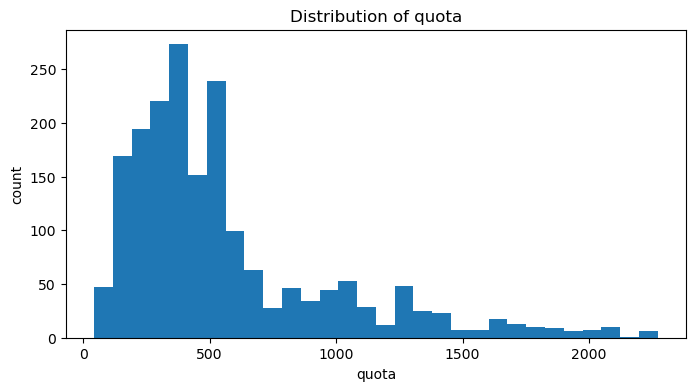

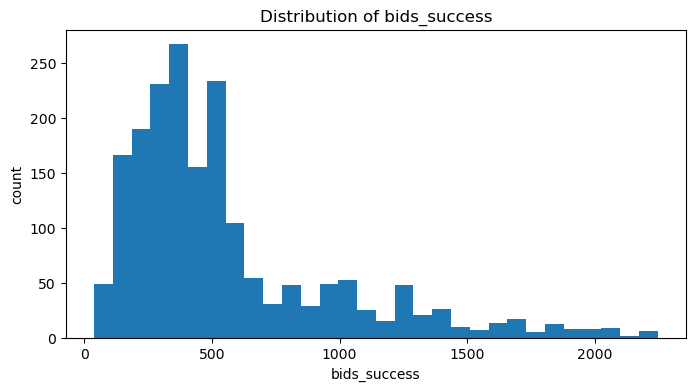

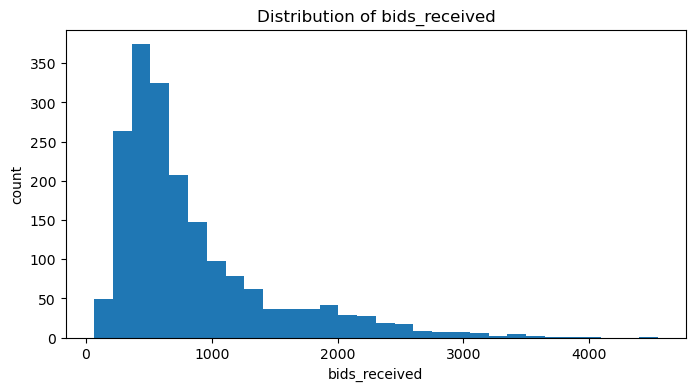

In [29]:
## Understanding distribution of features



import matplotlib.pyplot as plt

for col in ["quota", "bids_success", "bids_received"]:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


### 2.3.2 Understanding relationship between variables

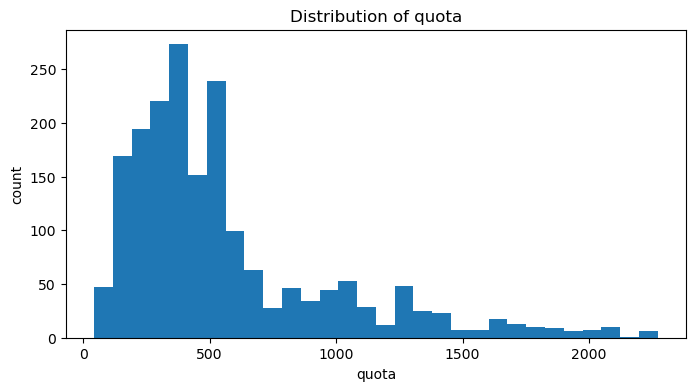

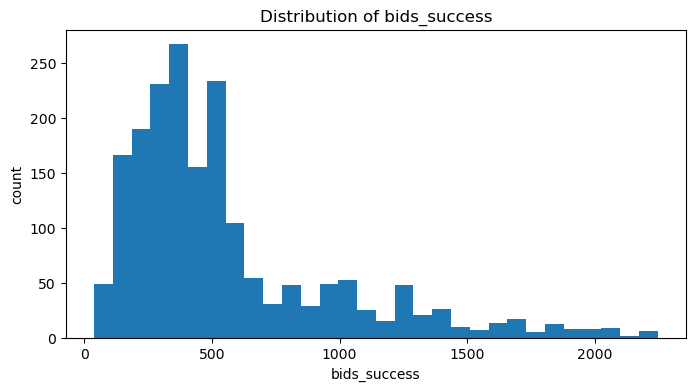

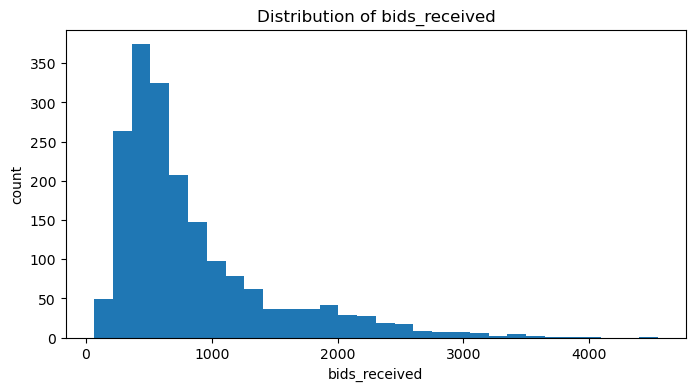

In [30]:
## Understanding distribution of features

import matplotlib.pyplot as plt

for col in ["quota", "bids_success", "bids_received"]:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [31]:
## Clean data
## Clean data

eps = 1e-9
df_clean = df.copy()

# Make sure types are correct
df_clean["month"] = pd.to_datetime(df_clean["month"], errors="coerce")
df_clean["bidding_no"] = pd.to_numeric(df_clean["bidding_no"], errors="coerce")

for c in ["quota", "bids_success", "bids_received", "premium"]:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

# Drop essential nulls (safe step)
df_clean = df_clean.dropna(subset=[
    "month","bidding_no","vehicle_class","quota","bids_success","bids_received","premium"
])

# Sort properly (CRITICAL for lag/target)
df_clean = df_clean.sort_values(["vehicle_class", "month", "bidding_no"]).reset_index(drop=True)

# Feature engineering
df_clean["demand_supply_ratio"] = df_clean["bids_received"] / (df_clean["quota"] + eps)
df_clean["success_rate"] = df_clean["bids_success"] / (df_clean["bids_received"] + eps)

df_clean["year"] = df_clean["month"].dt.year
df_clean["month_num"] = df_clean["month"].dt.month
df_clean["quarter"] = df_clean["month"].dt.quarter

# Lag features (no leakage)
df_clean["premium_lag1"] = df_clean.groupby("vehicle_class")["premium"].shift(1)
df_clean["premium_lag2"] = df_clean.groupby("vehicle_class")["premium"].shift(2)
df_clean["premium_lag3"] = df_clean.groupby("vehicle_class")["premium"].shift(3)

# Rolling features (shift first then roll = no peeking)
prev_premium = df_clean.groupby("vehicle_class")["premium"].shift(1)
df_clean["premium_roll_mean_3"] = prev_premium.groupby(df_clean["vehicle_class"]).rolling(3).mean().reset_index(level=0, drop=True)
df_clean["premium_roll_std_3"]  = prev_premium.groupby(df_clean["vehicle_class"]).rolling(3).std().reset_index(level=0, drop=True)

# Target: next premium for that vehicle class
df_clean["target_next_premium"] = df_clean.groupby("vehicle_class")["premium"].shift(-1)

# Final modelling dataframe
df_model = df_clean.dropna(subset=[
    "premium_lag1","premium_lag2","premium_lag3",
    "premium_roll_mean_3","target_next_premium"
]).reset_index(drop=True)

print("df_model shape:", df_model.shape)
display(df_model.head())


df_model shape: (1870, 18)


,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,demand_supply_ratio,success_rate,year,month_num,quarter,premium_lag1,premium_lag2,premium_lag3,premium_roll_mean_3,premium_roll_std_3,target_next_premium
0,2010-02-01,2,Category A,1148,1148,1493,20340,1.300523,0.768922,2010,2,1,19989.0,20501.0,18502.0,19664.000000,1038.373247,20802.0
1,2010-03-01,1,Category A,1148,1141,1758,20802,1.531359,0.649033,2010,3,1,20340.0,19989.0,20501.0,20276.666667,261.809727,28389.0
2,2010-03-01,2,Category A,1146,1137,2183,28389,1.904887,0.520843,2010,3,1,20802.0,20340.0,19989.0,20377.000000,407.760959,34001.0
3,2010-04-01,1,Category A,705,597,1379,34001,1.956028,0.432922,2010,4,2,28389.0,20802.0,20340.0,23177.000000,4519.631512,30000.0
4,2010-04-01,2,Category A,706,704,1242,30000,1.759207,0.566828,2010,4,2,34001.0,28389.0,20802.0,27730.666667,6624.081244,26102.0


## 3.2 Train-Test Split

In [32]:
## Split data into train set and test set

# Sort by time so test set is the newest data
df_model = df_model.sort_values(["month", "bidding_no", "vehicle_class"]).reset_index(drop=True)

feature_cols = [
    "vehicle_class",
    "bidding_no",
    "quota", "bids_success", "bids_received",
    "demand_supply_ratio", "success_rate",
    "year", "month_num", "quarter",
    "premium_lag1", "premium_lag2", "premium_lag3",
    "premium_roll_mean_3", "premium_roll_std_3"
]

X = df_model[feature_cols]
y = df_model["target_next_premium"]

split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index].copy()
y_train = y.iloc[:split_index].copy()

X_test = X.iloc[split_index:].copy()
y_test = y.iloc[split_index:].copy()

print("Total rows:", len(df_model))
print("Train:", X_train.shape, "Test:", X_test.shape)


Total rows: 1870
Train: (1496, 15) Test: (374, 15)


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model
## Initialise and train model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

cat_features = ["vehicle_class"]
num_features = [c for c in feature_cols if c not in cat_features]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)
#algorithm
models = {
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
}

trained = {}
for name, model in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    trained[name] = pipe
    print("Trained:", name)


Trained: Ridge
Trained: RandomForest
Trained: GradientBoosting


In [ ]:
## Hyperparameter tuning (RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np

# Transform once (faster than tuning the full pipeline repeatedly)
X_train_tx = preprocess.fit_transform(X_train)
X_test_tx = preprocess.transform(X_test)

ridge = Ridge()

# <= 3 values each, vary 2 hyperparameters
param_dist = {
    "alpha": [0.1, 1.0, 10.0],
    "fit_intercept": [True, False]
}

tscv = TimeSeriesSplit(n_splits=3)

search = RandomizedSearchCV(
    ridge,
    param_distributions=param_dist,
    n_iter=4,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    random_state=42,
    n_jobs=1
)

search.fit(X_train_tx, y_train)

best_ridge = search.best_estimator_
print("Best params:", search.best_params_)
print("Best CV score (neg MAE):", search.best_score_)


# Compare tuned vs untuned on TEST 
untuned = Ridge(alpha=1.0, fit_intercept=True).fit(X_train_tx, y_train)

def eval_reg(y_true, y_pred, label):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    return {
        "model": label,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

compare_df = pd.DataFrame([
    eval_reg(y_test, untuned.predict(X_test_tx), "Ridge (untuned)"),
    eval_reg(y_test, best_ridge.predict(X_test_tx), "Ridge (tuned)")
]).sort_values("MAE")

display(compare_df)


Best params: {'fit_intercept': False, 'alpha': 0.1}
Best CV score (neg MAE): -4420.336253839706


,model,MAE,RMSE,R2
0,Ridge (untuned),4843.900325,7118.081177,0.969334
1,Ridge (tuned),4873.303984,7171.200658,0.968875


# 5. Model Evaluation

,model,MAE,RMSE,R2
1,Ridge,4843.900325,7118.081177,0.969334
0,Baseline (lag1),4876.013369,7478.442332,0.966151
3,GradientBoosting,6539.346707,9942.400183,0.940172
2,RandomForest,6757.181979,10094.389333,0.938328


,Actual_next_premium,Predicted_next_premium,Error
354,110002.0,122397.825990,-12395.825990
355,115001.0,134310.928932,-19309.928932
356,76000.0,73945.728413,2054.271587
357,8600.0,8608.510325,-8.510325
358,121010.0,134843.640985,-13833.640985
359,109000.0,115891.504876,-6891.504876
360,129890.0,126525.316036,3364.683964
361,76389.0,75880.792759,508.207241
362,8729.0,8434.500852,294.499148
363,125001.0,134414.909910,-9413.909910


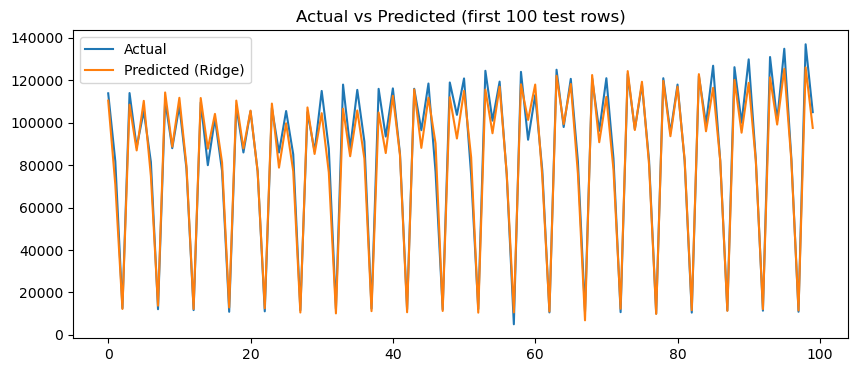

In [ ]:
## Evaluate model

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def eval_reg(y_true, y_pred, label):
    return {
        "model": label,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
    }

results = []

# Baseline: predict next premium = last premium
baseline_pred = X_test["premium_lag1"].values
results.append(eval_reg(y_test, baseline_pred, "Baseline (lag1)"))
#alogirthm 
for name, pipe in trained.items():
    pred = pipe.predict(X_test)
    results.append(eval_reg(y_test, pred, name))

results_df = pd.DataFrame(results).sort_values("MAE")
display(results_df)

# --- Show predicted outputs (Actual vs Predicted table) ---
best_name = results_df.iloc[0]["model"]
best_model = trained[best_name]

y_pred = best_model.predict(X_test)

pred_table = pd.DataFrame({
    "Actual_next_premium": y_test.values,
    "Predicted_next_premium": y_pred,
    "Error": y_test.values - y_pred
})

display(pred_table.tail(20))


# Plot actual vs best model (first 100)
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label=f"Predicted ({best_name})")
plt.title("Actual vs Predicted (first 100 test rows)")
plt.legend()
plt.show()


In [36]:
# --- Optional: Classification report (Up vs Down) ---
from sklearn.metrics import classification_report, confusion_matrix

true_change = y_test.values - X_test["premium_lag1"].values
pred_change = y_pred - X_test["premium_lag1"].values

y_true_cls = (true_change > 0).astype(int)   # 1 = Up, 0 = Down
y_pred_cls = (pred_change > 0).astype(int)

print("Classification Report (Up vs Down):")
print(classification_report(y_true_cls, y_pred_cls, target_names=["Down", "Up"]))

print("Confusion Matrix:")
print(confusion_matrix(y_true_cls, y_pred_cls))


Classification Report (Up vs Down):
              precision    recall  f1-score   support

        Down       0.49      0.93      0.64       163
          Up       0.82      0.24      0.37       211

    accuracy                           0.54       374
   macro avg       0.65      0.58      0.50       374
weighted avg       0.67      0.54      0.49       374

Confusion Matrix:
[[152  11]
 [161  50]]


In [37]:
## New data

## Predict

best_name = results_df.iloc[0]["model"]
best_model = trained[best_name]
print("Best model:", best_name)


import joblib
joblib.dump(best_model, "best_model.joblib")
print("Saved best_model.joblib")

def predict_next_for_vehicle_class(vc):
    latest = df_model[df_model["vehicle_class"] == vc].sort_values(["month", "bidding_no"]).tail(1)
    if latest.empty:
        raise ValueError("No data found for that vehicle_class.")

    X_latest = latest[feature_cols] 
    pred = best_model.predict(X_latest)[0]

    return {
        "vehicle_class": vc,
        "latest_month": str(latest["month"].iloc[0].date()),
        "latest_bidding_no": int(latest["bidding_no"].iloc[0]),
        "latest_premium": float(latest["premium"].iloc[0]),
        "predicted_next_premium": float(pred),
        "model_used": best_name
    }

display(predict_next_for_vehicle_class("Category A"))


Best model: Ridge
Saved best_model.joblib


{'vehicle_class': 'Category A',
 'latest_month': '2025-12-01',
 'latest_bidding_no': 1,
 'latest_premium': 105413.0,
 'predicted_next_premium': 104654.91814351126,
 'model_used': 'Ridge'}

## Iterative model development


In [38]:
## Further feature engineering / feature selection

from sklearn.inspection import permutation_importance
import pandas as pd

# Get best model from results_df
best_name = results_df.iloc[0]["model"]
best_model = trained[best_name]

perm = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=3,
    random_state=42,
    scoring="neg_mean_absolute_error"
)

pi = pd.DataFrame({
    "feature": feature_cols,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False)

display(pi.head(15))


,feature,importance
10,premium_lag1,34470.866682
13,premium_roll_mean_3,7381.221286
11,premium_lag2,6278.551174
2,quota,3329.972137
3,bids_success,2011.868438
6,success_rate,849.688114
12,premium_lag3,746.666583
4,bids_received,639.692372
0,vehicle_class,578.827404
14,premium_roll_std_3,281.204929
